<div><img src="imm.png"height="300" width="900" ></div>

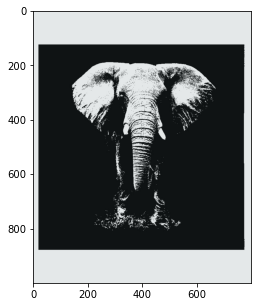

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
import pandas as pd

# Loading image
image = cv2.imread('im/elephon.jpg')
(h1, w1) = image.shape[:2]

# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#reshape the image to a 2D array of pixels and 3 color values (RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('im/elephon2.jpg', quant)
image0 = cv2.imread('im/elephon2.jpg')

plt.figure(num = 1, figsize = (5,5))
plt.imshow(image0)

cv2.imread('im/elephon.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

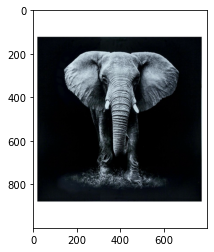

In [2]:
plt.imshow(image)

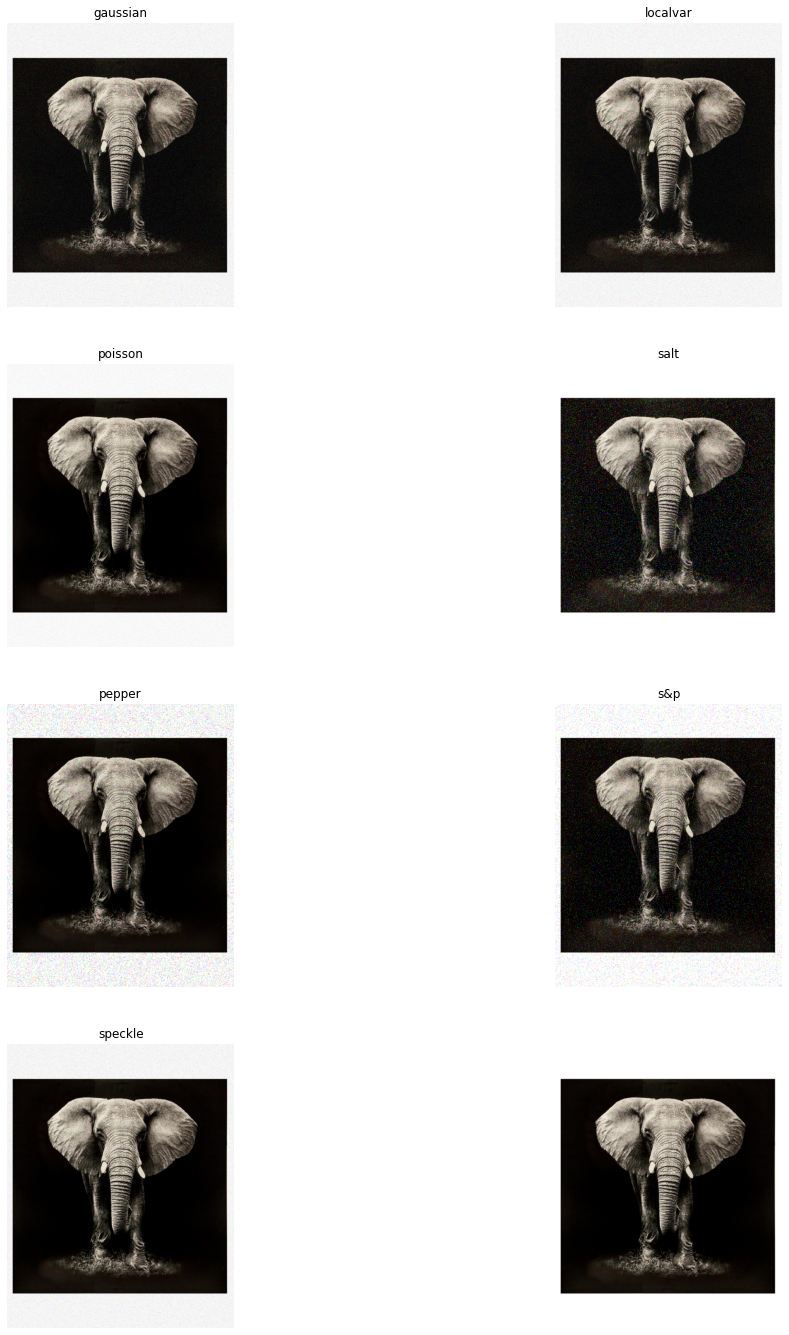

In [3]:
import skimage.io
import matplotlib.pyplot as plt

img_path = "im/elephon.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

# algorithme de K-means Clustering

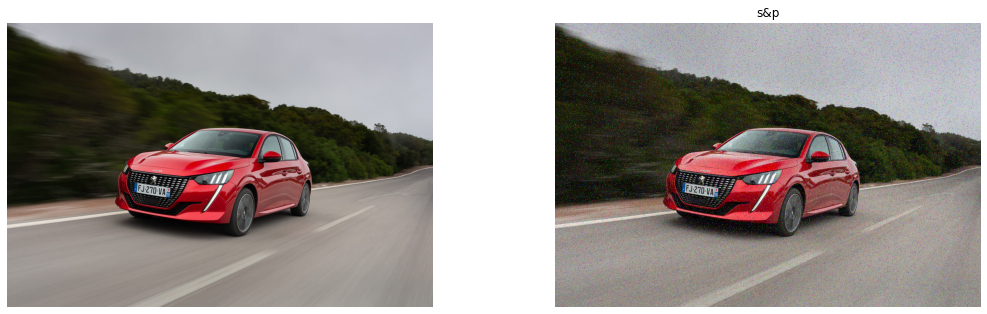

In [5]:
import skimage.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
img_path="im/voit.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        mpimg.imsave("rslt.png",  gimg)
        

    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img,None, r,c,1)
plotnoise(img, "s&p", r,c,2)

plt.show()

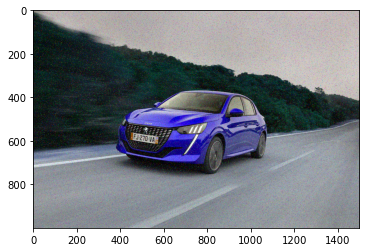

In [6]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('rslt.png')

(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('rslt2.png', quant)
plt.imshow(image)

cv2.imread('rsltt.png')
cv2.waitKey(0)
cv2.destroyAllWindows()

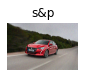

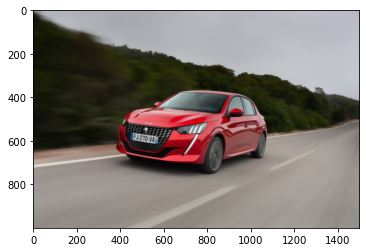

In [7]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt

img_path="rslt.jpg"

plotnoise(img, "s&p", r,c,3)
plt.show()
noise = denoise_tv_chambolle(img,
weight=0.1,
multichannel=True)

plt.imshow(noise)
plt.imsave("nvimage.jpg",noise)

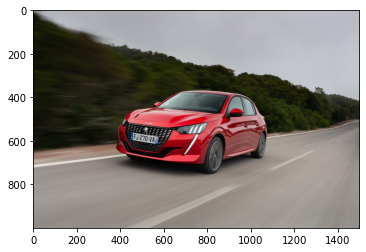

In [8]:
image = cv2.imread('im/voit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [10]:
def CulsterImage(k):
   
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)

    labels = labels.flatten()

    segmented_image = centers[labels.flatten()]

    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

In [11]:
k2=CulsterImage(2)
k4=CulsterImage(4)
k6=CulsterImage(6)
k8=CulsterImage(8)
k10=CulsterImage(10)

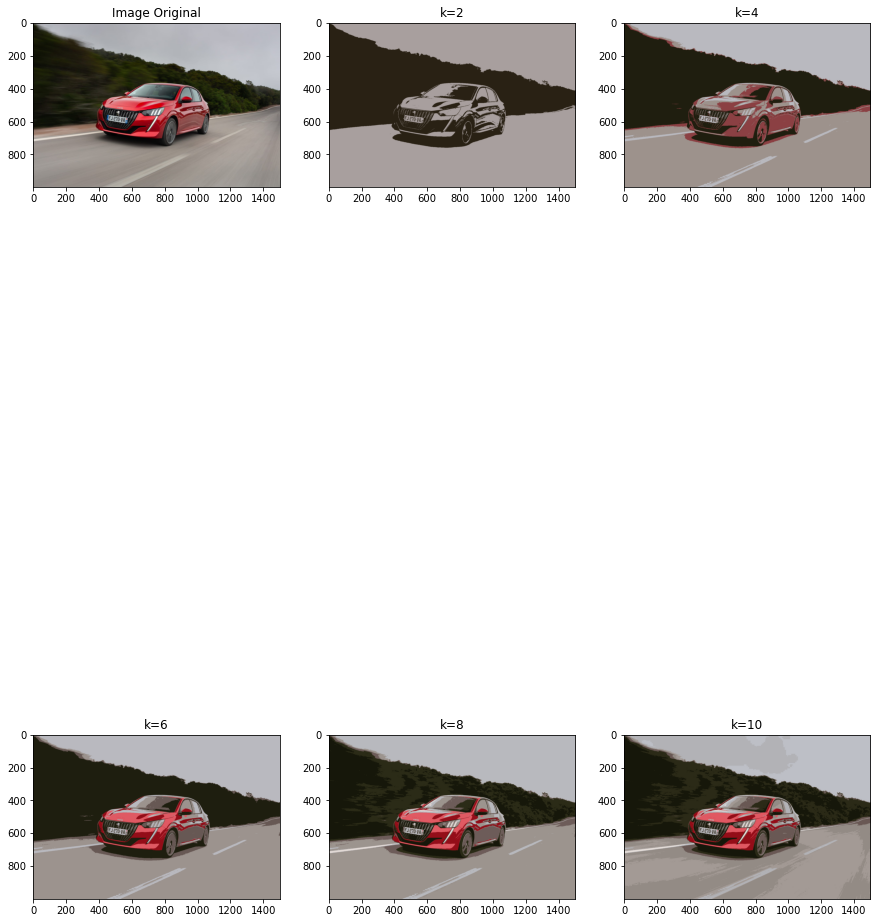

In [12]:
plt.figure(figsize=(15,24))

plt.subplot(2,3,1)
plt.title('Image Original')
plt.imshow(image)

plt.subplot(2,3,2)
plt.title('k=2')
plt.imshow(k2)

plt.subplot(2,3,3)
plt.title('k=4')
plt.imshow(k4)

plt.subplot(2,3,4)
plt.title('k=6')
plt.imshow(k6)

plt.subplot(2,3,5)
plt.title('k=8')
plt.imshow(k8)

plt.subplot(2,3,6)
plt.title('k=10')
plt.imshow(k10)

plt.show()